<a href="https://colab.research.google.com/github/Daniel0507-2001/Procesamiento-digital-de-se-ales/blob/main/matrices_fuerier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Al modificar la dimensión de una matriz de Fourier y ajustar las dimensiones restantes, se observan los siguientes efectos:

1. Cambio en la dimensión de la matriz de Fourier (1D):
Aumentar la dimensión (zero-padding):

Resolución espectral: Incrementa el número de puntos en el dominio de la frecuencia (interpolación), pero no añade información nueva.

Fase: Para un vector delta no centrado en el origen (
δ
[
n
−
n
0
]
δ[n−n
0
​
 ]), la fase del resultado se modifica según
e
−
2
π
i
k
n
0
/
M
e
−2πikn
0
​
 /M
 , donde
M
M es la nueva dimensión. La magnitud permanece constante.

Delta en el origen (
δ
[
0
]
δ[0]): La transformada sigue siendo un vector constante (todos 1), independientemente de
M
M.

Reducir la dimensión (truncamiento):

Aliasing: Si
M
<
N
M<N, se pierden componentes de alta frecuencia, causando solapamiento espectral.

Delta truncado: Si
n
0
≥
M
n
0
​
 ≥M, el delta desaparece, resultando en un espectro nulo. Si
n
0
<
M
n
0
​
 <M, la fase se ajusta a
e
−
2
π
i
k
n
0
/
M
e
−2πikn
0
​
 /M
 .

2. Dimensiones restantes (caso multidimensional):
Transformadas en 2D/3D: Si se modifica una dimensión (ej: filas) y se mantienen otras (ej: columnas), la resolución espectral cambia solo en el eje modificado.

Ejemplo: En una imagen, aumentar las filas (zero-padding) genera más muestras de frecuencia vertical, mientras las columnas conservan su resolución original.

Independencia de ejes: Cada dimensión se transforma por separado, por lo que alterar una no afecta la frecuencia en las demás.

3. Efecto en vectores delta (entrada con un "1"):
Delta en el origen: La transformada siempre es plana (todos 1), sin importar
M
M.

Delta desplazado: La fase varía con
M
M, reflejando una frecuencia aparente distinta debido al escalado
n
0
/
M
n
0
​
 /M.

Conclusión:
Modificar la dimensión de la matriz de Fourier altera la representación espectral según el ajuste aplicado (zero-padding o truncamiento). En señales multidimensionales, los cambios se limitan a los ejes modificados, preservando la estructura en las dimensiones restantes. Esto permite controlar la resolución y el aliasing en dominios específicos

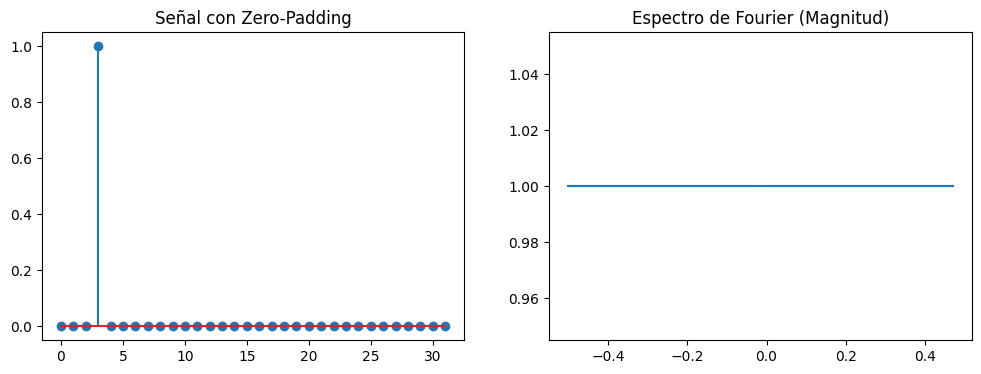

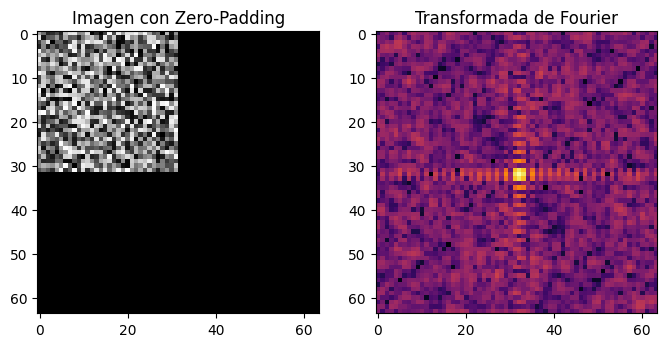

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform_1d(signal, M_new):
    """Aplica zero-padding o truncamiento a una señal 1D y calcula su FFT."""
    N = len(signal)

    if M_new > N:
        # Zero-padding
        signal_padded = np.pad(signal, (0, M_new - N), mode='constant')
    else:
        # Truncamiento
        signal_padded = signal[:M_new]

    fft_result = np.fft.fft(signal_padded)
    freqs = np.fft.fftfreq(M_new)

    return freqs, fft_result, signal_padded

def fourier_transform_2d(image, new_shape):
    """Aplica zero-padding o truncamiento a una imagen 2D y calcula su FFT."""
    padded_image = np.zeros(new_shape, dtype=image.dtype)
    original_shape = image.shape

    padded_image[:min(new_shape[0], original_shape[0]), :min(new_shape[1], original_shape[1])] = \
        image[:min(new_shape[0], original_shape[0]), :min(new_shape[1], original_shape[1])]

    fft_result = np.fft.fft2(padded_image)
    fft_shifted = np.fft.fftshift(np.log(np.abs(fft_result) + 1))

    return fft_shifted, padded_image

# Ejemplo 1D: Delta desplazado y zero-padding/truncamiento
N = 16
n0 = 3
signal = np.zeros(N)
signal[n0] = 1  # Delta desplazado
M_new = 32  # Aumentamos la resolución espectral con zero-padding

freqs, fft_result, signal_padded = fourier_transform_1d(signal, M_new)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(signal_padded)  # Eliminamos use_line_collection=True
plt.title("Señal con Zero-Padding")
plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(fft_result))
plt.title("Espectro de Fourier (Magnitud)")
plt.show()

# Ejemplo 2D: Zero-padding en imagen
image = np.random.rand(32, 32)  # Imagen de prueba
new_shape = (64, 64)  # Nueva dimensión con zero-padding
fft_image, padded_image = fourier_transform_2d(image, new_shape)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(padded_image, cmap='gray')
plt.title("Imagen con Zero-Padding")
plt.subplot(1, 2, 2)
plt.imshow(fft_image, cmap='inferno')
plt.title("Transformada de Fourier")
plt.show()
